In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from datetime import datetime as dt
import xlrd
from scipy.stats import linregress

In [2]:
# Read 2020 State Debt data to DF
debt_data = 'covid_data_local/state_debt_data.xlsx'
debt_df = pd.read_excel(debt_data)
debt_df

,state,debt,PerCapita,Pop
0,Alabama,8772871,1787,4908621
1,Alaska,5921713,8068,734002
2,Arizona,14291349,1937,7378494
3,Arkansas,4801939,1580,3038999
4,California,152772292,3825,39937489
5,Colorado,16980689,2905,5845526
6,Connecticut,38756156,10877,3563077
7,Delaware,4561576,4641,982895
8,Florida,28823847,1311,21992985
9,Georgia,13050862,1216,10736059


In [3]:
# Read Covid-19 policy data to DF
policy_data = 'covid_data_local/policy_values.xlsx'
policy_df = pd.read_excel(policy_data)
policy_df

,fips_code,state,soe_declared,advisory_enacted,advisors_lifted,advisory_dur,order_enacted,order_relaxed,order_dur,shelter_score,gathering_ban,out_of_state_travel_restricted,biz_restriction_enacted,biz_restriction_relaxed,biz_dur,schools_closed,daycares_closed,bars_and_restaurants_closed,oth-non_essential_closed
0,1,Alabama,2020-03-13,2020-04-04,2020-04-30,26.0,2020-04-04,2020-04-30,26.0,1.0,0.5,0.0,2020-03-28,2020-04-30,33.0,1,1.0,1.0,1.0
1,2,Alaska,2020-03-11,NaT,NaT,NaN,2020-03-28,2020-04-24,27.0,1.0,0.5,1.0,2020-03-18,2020-05-08,51.0,1,1.0,1.0,1.0
2,4,Arizona,2020-03-11,NaT,NaT,NaN,2020-03-31,2020-05-15,45.0,1.0,0.0,0.5,2020-03-20,2020-04-29,40.0,1,1.0,1.0,1.0
3,5,Arkansas,2020-03-11,NaT,NaT,NaN,NaT,NaT,NaN,0.0,0.5,0.0,NaT,NaT,NaN,1,1.0,1.0,0.5
4,6,California,2020-03-04,NaT,NaT,NaN,2020-03-19,2020-05-12,54.0,1.0,1.0,0.0,2020-03-19,2020-05-04,46.0,1,1.0,1.0,1.0
5,8,Colorado,2020-03-10,2020-03-26,2020-04-26,31.0,2020-03-26,2020-04-26,31.0,1.0,0.5,0.0,2020-03-26,2020-05-25,60.0,1,0.5,1.0,1.0
6,9,Connecticut,2020-03-10,NaT,NaT,NaN,2020-03-23,2020-05-20,58.0,1.0,1.0,0.5,2020-03-20,2020-05-20,61.0,1,1.0,1.0,1.0
7,10,Delaware,2020-03-12,NaT,NaT,NaN,2020-03-24,2020-05-31,68.0,1.0,1.0,1.0,2020-03-22,2020-05-08,47.0,1,1.0,1.0,1.0
8,12,Florida,2020-03-01,2020-04-03,2020-05-04,31.0,2020-04-03,2020-05-04,31.0,1.0,0.5,0.5,2020-03-20,2020-04-29,40.0,1,1.0,1.0,1.0
9,13,Georgia,2020-03-14,2020-04-03,2020-04-30,27.0,2020-04-03,2020-04-30,27.0,1.0,0.5,0.0,2020-04-03,2020-04-30,27.0,1,0.0,1.0,1.0


In [4]:
# Merge Debt & policy DFs
debt_policy_df = pd.merge(debt_df, policy_df, how='left', on='state')
debt_policy_df

,state,debt,PerCapita,Pop,fips_code,soe_declared,advisory_enacted,advisors_lifted,advisory_dur,order_enacted,...,shelter_score,gathering_ban,out_of_state_travel_restricted,biz_restriction_enacted,biz_restriction_relaxed,biz_dur,schools_closed,daycares_closed,bars_and_restaurants_closed,oth-non_essential_closed
0,Alabama,8772871,1787,4908621,1,2020-03-13,2020-04-04,2020-04-30,26.0,2020-04-04,...,1.0,0.5,0.0,2020-03-28,2020-04-30,33.0,1,1.0,1.0,1.0
1,Alaska,5921713,8068,734002,2,2020-03-11,NaT,NaT,NaN,2020-03-28,...,1.0,0.5,1.0,2020-03-18,2020-05-08,51.0,1,1.0,1.0,1.0
2,Arizona,14291349,1937,7378494,4,2020-03-11,NaT,NaT,NaN,2020-03-31,...,1.0,0.0,0.5,2020-03-20,2020-04-29,40.0,1,1.0,1.0,1.0
3,Arkansas,4801939,1580,3038999,5,2020-03-11,NaT,NaT,NaN,NaT,...,0.0,0.5,0.0,NaT,NaT,NaN,1,1.0,1.0,0.5
4,California,152772292,3825,39937489,6,2020-03-04,NaT,NaT,NaN,2020-03-19,...,1.0,1.0,0.0,2020-03-19,2020-05-04,46.0,1,1.0,1.0,1.0
5,Colorado,16980689,2905,5845526,8,2020-03-10,2020-03-26,2020-04-26,31.0,2020-03-26,...,1.0,0.5,0.0,2020-03-26,2020-05-25,60.0,1,0.5,1.0,1.0
6,Connecticut,38756156,10877,3563077,9,2020-03-10,NaT,NaT,NaN,2020-03-23,...,1.0,1.0,0.5,2020-03-20,2020-05-20,61.0,1,1.0,1.0,1.0
7,Delaware,4561576,4641,982895,10,2020-03-12,NaT,NaT,NaN,2020-03-24,...,1.0,1.0,1.0,2020-03-22,2020-05-08,47.0,1,1.0,1.0,1.0
8,Florida,28823847,1311,21992985,12,2020-03-01,2020-04-03,2020-05-04,31.0,2020-04-03,...,1.0,0.5,0.5,2020-03-20,2020-04-29,40.0,1,1.0,1.0,1.0
9,Georgia,13050862,1216,10736059,13,2020-03-14,2020-04-03,2020-04-30,27.0,2020-04-03,...,1.0,0.5,0.0,2020-04-03,2020-04-30,27.0,1,0.0,1.0,1.0


In [5]:
# Read Correlates of Policy data to DF

# Jordan, Marty P. and Matt Grossmann. 2020. The Correlates of State Policy Project v2.2.
# East Lansing, MI: Institute for Public Policy and Social Research (IPPSR).

cor_data = 'covid_data_local/correlatesofstatepolicyprojectv2_2.csv'
cor = pd.read_csv(cor_data)
cor.head(60)

C:\Users\erikl\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (36,485,495,496,497,498,499,500,501,502,505,511,513,516,518,521,522,525,532,537,539,541,543,544,671,843,844,1087,1093,1124,1318,1513,1619,1620,1890) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,year,st,stateno,state,state_fips,state_icpsr,poptotal,popdensity,popfemale,pctpopfemale,...,nwcirr,regulation_boehmke_cogrowman,regulation_boehmke_livingwill,regulation_housing_directstateai,regulation_housing_enabling_federal_aid,regulation_rent_control,regulation_rfra,regulation_sedition_laws,regulations_lemonlaw,regulations_state_debt_limitatio
0,1900,AL,1.0,Alabama,1,41,1830000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900,AK,2.0,Alaska,2,81,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900,AZ,3.0,Arizona,4,61,124000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900,AR,4.0,Arkansas,5,42,1314000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1900,CA,5.0,California,6,71,1490000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1900,CO,6.0,Colorado,8,62,543000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1900,CT,7.0,Connecticut,9,1,910000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1900,DE,8.0,Delaware,10,11,185000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1900,DC,8.5,District of Columbia,11,55,278000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1900,FL,9.0,Florida,12,43,530000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Striping Down & Cleaning Correlates Data

# removing records bfore 1993 and after 2016
cor = cor[(cor['year'] > 2011) & (cor['year'] < 2017)]
cor = cor[cor['state_fips'] != 11]

# Selecting columns from correlates dataset
polar_df = cor.loc[ :, ['year', #Data year
                        'st', #State Abr.
                        'stateno', #State numeric
                        'state', #State
                        'state_fips', #State Fips Code
                        
                        'hou_chamber', #State house ideological median
                        'sen_chamber', #State senate ideological median
                        'hou_majority', #State house majority party ideological median
                        'sen_majority', #State senate majority party ideological median
                        
                        'h_diffs', #Distance between party medians in state housee
                        's_diffs', #Distance between party medians in state senate
                       ]]

In [7]:
# Group-by Correlates data by state then calculate the average ideology (conservative vs. liberal) and
# polarization (ideological difference) of each state's state-house, state-senate, and state-majority
# party bodies between 2012 & 2016 (most current 5-year data)

polar_states = polar_df.groupby(['state'])
polar_avgs = pd.DataFrame()

polar_avgs['avg_sen_maj_ideology'] = polar_states['sen_majority'].mean() #average ideological
polar_avgs['avg_hou_maj_ideology'] = polar_states['hou_majority'].mean()
polar_avgs['avg_sen_ideology'] = polar_states['sen_chamber'].mean()
polar_avgs['avg_hou_ideology'] = polar_states['hou_chamber'].mean()
polar_avgs['avg_sen_polarz'] = polar_states['s_diffs'].mean()
polar_avgs['avg_hou_polarz'] = polar_states['h_diffs'].mean()

polar_avgs

,avg_sen_maj_ideology,avg_hou_maj_ideology,avg_sen_ideology,avg_hou_ideology,avg_sen_polarz,avg_hou_polarz
state,,,,,,
Alabama,1.094200,0.893400,1.03360,0.799200,1.791600,1.362600
Alaska,0.544600,0.803400,0.48460,0.592400,1.529200,1.306800
Arizona,1.021000,1.219250,0.70075,0.780750,2.474500,2.694750
Arkansas,0.816200,0.939000,0.76880,0.735600,0.771200,1.000400
California,-1.599000,-1.661800,-1.40340,-1.227000,3.003800,3.148200
Colorado,-1.180400,-1.170800,-0.45120,-0.766000,2.915400,3.453600
Connecticut,-1.233800,-1.152000,-1.03040,-0.990800,1.386400,1.223200
Delaware,-0.547200,-0.876800,-0.45960,-0.765800,0.934000,1.278400
Florida,0.525800,0.733600,0.36640,0.603600,1.589000,1.779600


In [8]:
# Merge polar_avgs into debt_policy_df
debt_policy_polar_df = pd.merge(debt_policy_df, polar_avgs, how='left', on='state')
debt_policy_polar_df

,state,debt,PerCapita,Pop,fips_code,soe_declared,advisory_enacted,advisors_lifted,advisory_dur,order_enacted,...,schools_closed,daycares_closed,bars_and_restaurants_closed,oth-non_essential_closed,avg_sen_maj_ideology,avg_hou_maj_ideology,avg_sen_ideology,avg_hou_ideology,avg_sen_polarz,avg_hou_polarz
0,Alabama,8772871,1787,4908621,1,2020-03-13,2020-04-04,2020-04-30,26.0,2020-04-04,...,1,1.0,1.0,1.0,1.094200,0.893400,1.03360,0.799200,1.791600,1.362600
1,Alaska,5921713,8068,734002,2,2020-03-11,NaT,NaT,NaN,2020-03-28,...,1,1.0,1.0,1.0,0.544600,0.803400,0.48460,0.592400,1.529200,1.306800
2,Arizona,14291349,1937,7378494,4,2020-03-11,NaT,NaT,NaN,2020-03-31,...,1,1.0,1.0,1.0,1.021000,1.219250,0.70075,0.780750,2.474500,2.694750
3,Arkansas,4801939,1580,3038999,5,2020-03-11,NaT,NaT,NaN,NaT,...,1,1.0,1.0,0.5,0.816200,0.939000,0.76880,0.735600,0.771200,1.000400
4,California,152772292,3825,39937489,6,2020-03-04,NaT,NaT,NaN,2020-03-19,...,1,1.0,1.0,1.0,-1.599000,-1.661800,-1.40340,-1.227000,3.003800,3.148200
5,Colorado,16980689,2905,5845526,8,2020-03-10,2020-03-26,2020-04-26,31.0,2020-03-26,...,1,0.5,1.0,1.0,-1.180400,-1.170800,-0.45120,-0.766000,2.915400,3.453600
6,Connecticut,38756156,10877,3563077,9,2020-03-10,NaT,NaT,NaN,2020-03-23,...,1,1.0,1.0,1.0,-1.233800,-1.152000,-1.03040,-0.990800,1.386400,1.223200
7,Delaware,4561576,4641,982895,10,2020-03-12,NaT,NaT,NaN,2020-03-24,...,1,1.0,1.0,1.0,-0.547200,-0.876800,-0.45960,-0.765800,0.934000,1.278400
8,Florida,28823847,1311,21992985,12,2020-03-01,2020-04-03,2020-05-04,31.0,2020-04-03,...,1,1.0,1.0,1.0,0.525800,0.733600,0.36640,0.603600,1.589000,1.779600
9,Georgia,13050862,1216,10736059,13,2020-03-14,2020-04-03,2020-04-30,27.0,2020-04-03,...,1,0.0,1.0,1.0,0.944600,0.936600,0.86060,0.807600,1.756200,1.709800


In [9]:
# Load in Neil's code for county data for cases (lightly modified for pupose). Code is
# grouped in one block to facilitate attrubution of work.

# Ignoring "value is trying to be set on a copy of a slice from a DataFrame" warning
# as only keeping output columns to add to new DF & don't need original DF intact.

case_data = 'covid_data_local/Cases by day by county.csv'
case_df = pd.read_csv(case_data)

# Group Data by State (Neil's code)
states_cases = case_df.groupby('Province_State').sum()

# Drop non-state values and non-relevant columns (Neil's code)
province_state_list = states_cases.reset_index()['Province_State']
states_cases = states_cases.drop(axis=1, columns = ['UID','code3','FIPS','Lat','Long_'])
states_cases = states_cases.drop(['American Samoa',
                                  'Diamond Princess',
                                  'Grand Princess','Guam',
                                  'Northern Mariana Islands',
                                  'Puerto Rico',
                                  'Virgin Islands',
                                  'District of Columbia'])

# Calculate date of first case date and add as a column  (Neil's code)
states_cases['first_case'] = states_cases.keys()[np.argmax(states_cases.values!=0,axis=1)]

# Convert final date (6/19/2020) to date format  (Neil's code)
x = dt.strptime("6/19/2020", "%m/%d/%Y")

# convert first case date column to date format
states_cases['first_case'] =pd.to_datetime(states_cases['first_case'])
days_since_first_case = (x - states_cases['first_case'])

# Extract number from days_since_first_case string values and add as column to dataframe
states_cases['days_since_first_case'] = days_since_first_case.dt.days

# Whittle down the DF to required fields for analysis now that data has been extracted/calculated as needed

first_case_df = states_cases[['first_case','days_since_first_case']]
first_case_df.reset_index(inplace=True)
first_case_df.rename(columns={'Province_State':'state'}, inplace=True)
first_case_df.head(60)

C:\Users\erikl\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,state,first_case,days_since_first_case
0,Alabama,2020-03-13,98
1,Alaska,2020-03-13,98
2,Arizona,2020-01-26,145
3,Arkansas,2020-03-13,98
4,California,2020-01-26,145
5,Colorado,2020-03-05,106
6,Connecticut,2020-03-10,101
7,Delaware,2020-03-11,100
8,Florida,2020-03-02,109
9,Georgia,2020-03-03,108


In [10]:
# Merge first_case_df into debt_policy_polar_df
debt_policy_polar_case_df = pd.merge(debt_policy_polar_df, first_case_df, how='left', on='state')
debt_policy_polar_case_df

,state,debt,PerCapita,Pop,fips_code,soe_declared,advisory_enacted,advisors_lifted,advisory_dur,order_enacted,...,bars_and_restaurants_closed,oth-non_essential_closed,avg_sen_maj_ideology,avg_hou_maj_ideology,avg_sen_ideology,avg_hou_ideology,avg_sen_polarz,avg_hou_polarz,first_case,days_since_first_case
0,Alabama,8772871,1787,4908621,1,2020-03-13,2020-04-04,2020-04-30,26.0,2020-04-04,...,1.0,1.0,1.094200,0.893400,1.03360,0.799200,1.791600,1.362600,2020-03-13,98
1,Alaska,5921713,8068,734002,2,2020-03-11,NaT,NaT,NaN,2020-03-28,...,1.0,1.0,0.544600,0.803400,0.48460,0.592400,1.529200,1.306800,2020-03-13,98
2,Arizona,14291349,1937,7378494,4,2020-03-11,NaT,NaT,NaN,2020-03-31,...,1.0,1.0,1.021000,1.219250,0.70075,0.780750,2.474500,2.694750,2020-01-26,145
3,Arkansas,4801939,1580,3038999,5,2020-03-11,NaT,NaT,NaN,NaT,...,1.0,0.5,0.816200,0.939000,0.76880,0.735600,0.771200,1.000400,2020-03-13,98
4,California,152772292,3825,39937489,6,2020-03-04,NaT,NaT,NaN,2020-03-19,...,1.0,1.0,-1.599000,-1.661800,-1.40340,-1.227000,3.003800,3.148200,2020-01-26,145
5,Colorado,16980689,2905,5845526,8,2020-03-10,2020-03-26,2020-04-26,31.0,2020-03-26,...,1.0,1.0,-1.180400,-1.170800,-0.45120,-0.766000,2.915400,3.453600,2020-03-05,106
6,Connecticut,38756156,10877,3563077,9,2020-03-10,NaT,NaT,NaN,2020-03-23,...,1.0,1.0,-1.233800,-1.152000,-1.03040,-0.990800,1.386400,1.223200,2020-03-10,101
7,Delaware,4561576,4641,982895,10,2020-03-12,NaT,NaT,NaN,2020-03-24,...,1.0,1.0,-0.547200,-0.876800,-0.45960,-0.765800,0.934000,1.278400,2020-03-11,100
8,Florida,28823847,1311,21992985,12,2020-03-01,2020-04-03,2020-05-04,31.0,2020-04-03,...,1.0,1.0,0.525800,0.733600,0.36640,0.603600,1.589000,1.779600,2020-03-02,109
9,Georgia,13050862,1216,10736059,13,2020-03-14,2020-04-03,2020-04-30,27.0,2020-04-03,...,1.0,1.0,0.944600,0.936600,0.86060,0.807600,1.756200,1.709800,2020-03-03,108


In [11]:
neil_data = 'covid_data_local/neil_summary.csv'
neil_df = pd.read_csv(neil_data)
neil_df

,Unnamed: 0,Province_State,Total Cases,First Case Date,Days Since First Case,Cases per day,Total Deaths,First Death Date,Days Since First Death,Deaths per day,Mean of Median County Age,Tests per 100k Population,Average Temp Mar-May,Mortality Rate
0,0,Alabama,29002.0,2020-03-13,98,295.94,822,2020-03-25,86,9.56,40.63,6599,64.18,0.0283
1,1,Alaska,720.0,2020-03-13,98,7.35,12,2020-03-25,86,0.14,36.97,11009,30.28,0.0167
2,2,Arizona,46910.0,2020-01-26,145,323.52,1321,2020-03-21,90,14.68,40.23,5295,62.24,0.0282
3,3,Arkansas,14631.0,2020-03-13,98,149.30,214,2020-03-24,87,2.46,41.43,7580,60.59,0.0146
4,4,California,170862.0,2020-01-26,145,1178.36,5426,2020-03-04,107,50.71,39.61,7772,54.33,0.0318
5,5,Colorado,30172.0,2020-03-05,106,284.64,1643,2020-03-12,99,16.60,42.49,4604,45.82,0.0545
6,6,Connecticut,45557.0,2020-03-10,101,451.06,4238,2020-03-18,93,45.57,41.70,10429,47.37,0.0930
7,7,Delaware,10611.0,2020-03-11,100,106.11,433,2020-03-26,85,5.09,41.57,9169,53.85,0.0408
8,8,District of Columbia,9952.0,2020-03-16,95,104.76,530,2020-03-20,91,5.82,33.90,10278,57.43,0.0533
9,9,Florida,89748.0,2020-03-02,109,823.38,3104,2020-03-08,103,30.14,43.57,7096,74.73,0.0346


In [12]:
#cleaning Neil's summary for integration with final_df

summary_df = neil_df[['Province_State','Total Cases','First Case Date','Cases per day','Total Deaths','Days Since First Death', 'Deaths per day', 'Tests per 100k Population', 'Average Temp Mar-May','Mortality Rate']]

summary_df

,Province_State,Total Cases,First Case Date,Cases per day,Total Deaths,Days Since First Death,Deaths per day,Tests per 100k Population,Average Temp Mar-May,Mortality Rate
0,Alabama,29002.0,2020-03-13,295.94,822,86,9.56,6599,64.18,0.0283
1,Alaska,720.0,2020-03-13,7.35,12,86,0.14,11009,30.28,0.0167
2,Arizona,46910.0,2020-01-26,323.52,1321,90,14.68,5295,62.24,0.0282
3,Arkansas,14631.0,2020-03-13,149.30,214,87,2.46,7580,60.59,0.0146
4,California,170862.0,2020-01-26,1178.36,5426,107,50.71,7772,54.33,0.0318
5,Colorado,30172.0,2020-03-05,284.64,1643,99,16.60,4604,45.82,0.0545
6,Connecticut,45557.0,2020-03-10,451.06,4238,93,45.57,10429,47.37,0.0930
7,Delaware,10611.0,2020-03-11,106.11,433,85,5.09,9169,53.85,0.0408
8,District of Columbia,9952.0,2020-03-16,104.76,530,91,5.82,10278,57.43,0.0533
9,Florida,89748.0,2020-03-02,823.38,3104,103,30.14,7096,74.73,0.0346


In [13]:
summary_df.rename(columns={'Province_State':'state','Total Cases':'tot_cases','First Case Date':'first_case_date','Cases per day':'cases_per-day','Total Deaths':'tot_deaths','Days Since First Death': 'days_since_first-death', 'Deaths per day':'deaths_per_day', 'Tests per 100k Population': 'test_per_100k', 'Average Temp Mar-May': 'avg_temp_mar_to_may','Mortality Rate':'mortality_rate'}, inplace=True)
summary_df


C:\Users\erikl\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,state,tot_cases,first_case_date,cases_per-day,tot_deaths,days_since_first-death,deaths_per_day,test_per_100k,avg_temp_mar_to_may,mortality_rate
0,Alabama,29002.0,2020-03-13,295.94,822,86,9.56,6599,64.18,0.0283
1,Alaska,720.0,2020-03-13,7.35,12,86,0.14,11009,30.28,0.0167
2,Arizona,46910.0,2020-01-26,323.52,1321,90,14.68,5295,62.24,0.0282
3,Arkansas,14631.0,2020-03-13,149.30,214,87,2.46,7580,60.59,0.0146
4,California,170862.0,2020-01-26,1178.36,5426,107,50.71,7772,54.33,0.0318
5,Colorado,30172.0,2020-03-05,284.64,1643,99,16.60,4604,45.82,0.0545
6,Connecticut,45557.0,2020-03-10,451.06,4238,93,45.57,10429,47.37,0.0930
7,Delaware,10611.0,2020-03-11,106.11,433,85,5.09,9169,53.85,0.0408
8,District of Columbia,9952.0,2020-03-16,104.76,530,91,5.82,10278,57.43,0.0533
9,Florida,89748.0,2020-03-02,823.38,3104,103,30.14,7096,74.73,0.0346


In [14]:
neil_summary_df = summary_df.set_index('state')
neil_summary_df

,tot_cases,first_case_date,cases_per-day,tot_deaths,days_since_first-death,deaths_per_day,test_per_100k,avg_temp_mar_to_may,mortality_rate
state,,,,,,,,,
Alabama,29002.0,2020-03-13,295.94,822,86,9.56,6599,64.18,0.0283
Alaska,720.0,2020-03-13,7.35,12,86,0.14,11009,30.28,0.0167
Arizona,46910.0,2020-01-26,323.52,1321,90,14.68,5295,62.24,0.0282
Arkansas,14631.0,2020-03-13,149.30,214,87,2.46,7580,60.59,0.0146
California,170862.0,2020-01-26,1178.36,5426,107,50.71,7772,54.33,0.0318
Colorado,30172.0,2020-03-05,284.64,1643,99,16.60,4604,45.82,0.0545
Connecticut,45557.0,2020-03-10,451.06,4238,93,45.57,10429,47.37,0.0930
Delaware,10611.0,2020-03-11,106.11,433,85,5.09,9169,53.85,0.0408
District of Columbia,9952.0,2020-03-16,104.76,530,91,5.82,10278,57.43,0.0533


In [15]:
neils_summary_df = neil_summary_df.drop(['District of Columbia'])
neils_summary_df

,tot_cases,first_case_date,cases_per-day,tot_deaths,days_since_first-death,deaths_per_day,test_per_100k,avg_temp_mar_to_may,mortality_rate
state,,,,,,,,,
Alabama,29002.0,2020-03-13,295.94,822,86,9.56,6599,64.18,0.0283
Alaska,720.0,2020-03-13,7.35,12,86,0.14,11009,30.28,0.0167
Arizona,46910.0,2020-01-26,323.52,1321,90,14.68,5295,62.24,0.0282
Arkansas,14631.0,2020-03-13,149.30,214,87,2.46,7580,60.59,0.0146
California,170862.0,2020-01-26,1178.36,5426,107,50.71,7772,54.33,0.0318
Colorado,30172.0,2020-03-05,284.64,1643,99,16.60,4604,45.82,0.0545
Connecticut,45557.0,2020-03-10,451.06,4238,93,45.57,10429,47.37,0.0930
Delaware,10611.0,2020-03-11,106.11,433,85,5.09,9169,53.85,0.0408
Florida,89748.0,2020-03-02,823.38,3104,103,30.14,7096,74.73,0.0346


In [16]:
debt_policy_polar_neil_df = pd.merge(debt_policy_polar_df, neils_summary_df, how='left', on='state')
debt_policy_polar_neil_df

,state,debt,PerCapita,Pop,fips_code,soe_declared,advisory_enacted,advisors_lifted,advisory_dur,order_enacted,...,avg_hou_polarz,tot_cases,first_case_date,cases_per-day,tot_deaths,days_since_first-death,deaths_per_day,test_per_100k,avg_temp_mar_to_may,mortality_rate
0,Alabama,8772871,1787,4908621,1,2020-03-13,2020-04-04,2020-04-30,26.0,2020-04-04,...,1.362600,29002.0,2020-03-13,295.94,822,86,9.56,6599,64.18,0.0283
1,Alaska,5921713,8068,734002,2,2020-03-11,NaT,NaT,NaN,2020-03-28,...,1.306800,720.0,2020-03-13,7.35,12,86,0.14,11009,30.28,0.0167
2,Arizona,14291349,1937,7378494,4,2020-03-11,NaT,NaT,NaN,2020-03-31,...,2.694750,46910.0,2020-01-26,323.52,1321,90,14.68,5295,62.24,0.0282
3,Arkansas,4801939,1580,3038999,5,2020-03-11,NaT,NaT,NaN,NaT,...,1.000400,14631.0,2020-03-13,149.30,214,87,2.46,7580,60.59,0.0146
4,California,152772292,3825,39937489,6,2020-03-04,NaT,NaT,NaN,2020-03-19,...,3.148200,170862.0,2020-01-26,1178.36,5426,107,50.71,7772,54.33,0.0318
5,Colorado,16980689,2905,5845526,8,2020-03-10,2020-03-26,2020-04-26,31.0,2020-03-26,...,3.453600,30172.0,2020-03-05,284.64,1643,99,16.60,4604,45.82,0.0545
6,Connecticut,38756156,10877,3563077,9,2020-03-10,NaT,NaT,NaN,2020-03-23,...,1.223200,45557.0,2020-03-10,451.06,4238,93,45.57,10429,47.37,0.0930
7,Delaware,4561576,4641,982895,10,2020-03-12,NaT,NaT,NaN,2020-03-24,...,1.278400,10611.0,2020-03-11,106.11,433,85,5.09,9169,53.85,0.0408
8,Florida,28823847,1311,21992985,12,2020-03-01,2020-04-03,2020-05-04,31.0,2020-04-03,...,1.779600,89748.0,2020-03-02,823.38,3104,103,30.14,7096,74.73,0.0346
9,Georgia,13050862,1216,10736059,13,2020-03-14,2020-04-03,2020-04-30,27.0,2020-04-03,...,1.709800,62009.0,2020-03-03,574.16,2636,99,26.63,6305,64.40,0.0425


In [17]:
# Merge first_case-df into debt_policy_polar_df
final_df = pd.merge(debt_policy_polar_neil_df, first_case_df, how='left', on='state')
final_df.keys()

Index(['state', 'debt', 'PerCapita', 'Pop', 'fips_code', 'soe_declared',
       'advisory_enacted', 'advisors_lifted', 'advisory_dur', 'order_enacted',
       'order_relaxed', 'order_dur', 'shelter_score', 'gathering_ban',
       'out_of_state_travel_restricted', 'biz_restriction_enacted',
       'biz_restriction_relaxed', 'biz_dur', 'schools_closed',
       'daycares_closed', 'bars_and_restaurants_closed',
       'oth-non_essential_closed', 'avg_sen_maj_ideology',
       'avg_hou_maj_ideology', 'avg_sen_ideology', 'avg_hou_ideology',
       'avg_sen_polarz', 'avg_hou_polarz', 'tot_cases', 'first_case_date',
       'cases_per-day', 'tot_deaths', 'days_since_first-death',
       'deaths_per_day', 'test_per_100k', 'avg_temp_mar_to_may',
       'mortality_rate', 'first_case', 'days_since_first_case'],
      dtype='object')

In [18]:
# Clean up final_df
final_df = final_df[['state', # State name
                     'fips_code', # State Fips Code
                     'debt', # Total state debt
                     'PerCapita', # State debt per-capita
                     'Pop', # State population
                     'soe_declared', # date on which State declared state of emergency
                     'advisory_enacted', # Date that stay-at-home advisory enacted
                     'advisors_lifted', # Date that stay-at-home advisory expired or was upgraded to shelter-in-place order
                     'order_enacted', # date that shelter-in-place order enacted
                     'order_relaxed', # date that shelter-in-place order expired or relaxed substantially
                     'biz_restriction_enacted', # Date that majority of non-essential businesses were shut down on
                     'biz_restriction_relaxed', # Earliest date that full business restrictions were relaxed (begining of "reopening")
                     'first_case', # First recorded case in state
                     'advisory_dur', # Durration of pre-order or full advisory
                     'order_dur',# Durration of full shelter order restrictions
                     'biz_dur', # Durration of full business restrictions
                     'gathering_ban', # All gatherings = 1.0, gatherings<12 = 0.5, gatherings 12+ = 0.0
                     'out_of_state_travel_restricted', # Mandatory quarantine = 1.0, Limited/Regional/Recomended =0.5 , No = 0.0
                     'schools_closed', # Did state close schools: 1 = Yes, 0 = No
                     'daycares_closed', # Did state close daycares: 1 = Yes, 0.5 = regional/limited closures, 0 = No
                     'bars_and_restaurants_closed', # Did state close bars & restaurants: 1 = Yes, 0.5 = regional/limited closures, 0 = No
                     'oth-non_essential_closed', # Did state close other non-essential businesses: 1 = Yes, 0.5 = regional/limited closures, 0 = No
                     'shelter_score', # Order = 1.0, Advisory/Regional Order Only = 0.5, None = 0.0
                     'avg_sen_maj_ideology', # Average ideology (Conservative = 0+, Liberal = 0-) for state senate's majority party (Rep/Dem) from 2012-2016
                     'avg_hou_maj_ideology', # Average ideology (Conservative = 0+, Liberal = 0-) for state house's majority party (Rep/Dem) from 2012-2016
                     'avg_sen_ideology', # Average ideology (Conservative = 0+, Liberal = 0-) for state senate as a whole from 2012-2016
                     'avg_hou_ideology', # Average ideology (Conservative = 0+, Liberal = 0-) for state house as a whole from 2012-2016
                     'avg_sen_polarz', # Average Distance between party medians in state senate from 2012-2016
                     'avg_hou_polarz', # Average Distance between party medians in state house from 2012-2016
                     'days_since_first_case', # Calculation of number of days from first case to 6/19/2020
                     'tot_cases', 
                     'cases_per-day', 
                     'tot_deaths', 
                     'days_since_first-death',
                     'deaths_per_day', 
                     'test_per_100k', 
                     'avg_temp_mar_to_may',
                     'mortality_rate'
                    ]]

final_df.rename(columns={'advisors_lifted':'advisory_lifted', 'PerCapita':'per_cap_debt', 'Pop':'state_pop'}, inplace=True)

final_df = final_df.set_index('state')

final_df

,fips_code,debt,per_cap_debt,state_pop,soe_declared,advisory_enacted,advisory_lifted,order_enacted,order_relaxed,biz_restriction_enacted,...,avg_hou_polarz,days_since_first_case,tot_cases,cases_per-day,tot_deaths,days_since_first-death,deaths_per_day,test_per_100k,avg_temp_mar_to_may,mortality_rate
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1,8772871,1787,4908621,2020-03-13,2020-04-04,2020-04-30,2020-04-04,2020-04-30,2020-03-28,...,1.362600,98,29002.0,295.94,822,86,9.56,6599,64.18,0.0283
Alaska,2,5921713,8068,734002,2020-03-11,NaT,NaT,2020-03-28,2020-04-24,2020-03-18,...,1.306800,98,720.0,7.35,12,86,0.14,11009,30.28,0.0167
Arizona,4,14291349,1937,7378494,2020-03-11,NaT,NaT,2020-03-31,2020-05-15,2020-03-20,...,2.694750,145,46910.0,323.52,1321,90,14.68,5295,62.24,0.0282
Arkansas,5,4801939,1580,3038999,2020-03-11,NaT,NaT,NaT,NaT,NaT,...,1.000400,98,14631.0,149.30,214,87,2.46,7580,60.59,0.0146
California,6,152772292,3825,39937489,2020-03-04,NaT,NaT,2020-03-19,2020-05-12,2020-03-19,...,3.148200,145,170862.0,1178.36,5426,107,50.71,7772,54.33,0.0318
Colorado,8,16980689,2905,5845526,2020-03-10,2020-03-26,2020-04-26,2020-03-26,2020-04-26,2020-03-26,...,3.453600,106,30172.0,284.64,1643,99,16.60,4604,45.82,0.0545
Connecticut,9,38756156,10877,3563077,2020-03-10,NaT,NaT,2020-03-23,2020-05-20,2020-03-20,...,1.223200,101,45557.0,451.06,4238,93,45.57,10429,47.37,0.0930
Delaware,10,4561576,4641,982895,2020-03-12,NaT,NaT,2020-03-24,2020-05-31,2020-03-22,...,1.278400,100,10611.0,106.11,433,85,5.09,9169,53.85,0.0408
Florida,12,28823847,1311,21992985,2020-03-01,2020-04-03,2020-05-04,2020-04-03,2020-05-04,2020-03-20,...,1.779600,109,89748.0,823.38,3104,103,30.14,7096,74.73,0.0346


In [19]:
# Adding Calculation columns to table
us_pat_zero = final_df['first_case'].min()
final_df['state_outbeak_lag'] = (final_df['first_case'] - us_pat_zero).dt.days
final_df['advisory_lag'] = (final_df['advisory_enacted'] - final_df['first_case']).dt.days
final_df['order_lag'] = (final_df['order_enacted'] - final_df['first_case']).dt.days
final_df['biz_restrict_lag'] = (final_df['biz_restriction_enacted'] - final_df['first_case']).dt.days

final_df['ord_or_adv_lag'] = (final_df['order_enacted'] - final_df['first_case']).dt.days
final_df['ord_or_adv_lag'].fillna((final_df['advisory_enacted'] - final_df['first_case']).dt.days, inplace=True) #(adds Mass. & Kentucky advisory)

final_df['tot_death_per_cap'] = final_df['tot_deaths'] / final_df['state_pop'] # as of 6/19/2020

#for row in final_df:
#    try:
        
final_df

,fips_code,debt,per_cap_debt,state_pop,soe_declared,advisory_enacted,advisory_lifted,order_enacted,order_relaxed,biz_restriction_enacted,...,deaths_per_day,test_per_100k,avg_temp_mar_to_may,mortality_rate,state_outbeak_lag,advisory_lag,order_lag,biz_restrict_lag,ord_or_adv_lag,tot_death_per_cap
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1,8772871,1787,4908621,2020-03-13,2020-04-04,2020-04-30,2020-04-04,2020-04-30,2020-03-28,...,9.56,6599,64.18,0.0283,51,22.0,22.0,15.0,22.0,0.000167
Alaska,2,5921713,8068,734002,2020-03-11,NaT,NaT,2020-03-28,2020-04-24,2020-03-18,...,0.14,11009,30.28,0.0167,51,NaN,15.0,5.0,15.0,0.000016
Arizona,4,14291349,1937,7378494,2020-03-11,NaT,NaT,2020-03-31,2020-05-15,2020-03-20,...,14.68,5295,62.24,0.0282,4,NaN,65.0,54.0,65.0,0.000179
Arkansas,5,4801939,1580,3038999,2020-03-11,NaT,NaT,NaT,NaT,NaT,...,2.46,7580,60.59,0.0146,51,NaN,NaN,NaN,NaN,0.000070
California,6,152772292,3825,39937489,2020-03-04,NaT,NaT,2020-03-19,2020-05-12,2020-03-19,...,50.71,7772,54.33,0.0318,4,NaN,53.0,53.0,53.0,0.000136
Colorado,8,16980689,2905,5845526,2020-03-10,2020-03-26,2020-04-26,2020-03-26,2020-04-26,2020-03-26,...,16.60,4604,45.82,0.0545,43,21.0,21.0,21.0,21.0,0.000281
Connecticut,9,38756156,10877,3563077,2020-03-10,NaT,NaT,2020-03-23,2020-05-20,2020-03-20,...,45.57,10429,47.37,0.0930,48,NaN,13.0,10.0,13.0,0.001189
Delaware,10,4561576,4641,982895,2020-03-12,NaT,NaT,2020-03-24,2020-05-31,2020-03-22,...,5.09,9169,53.85,0.0408,49,NaN,13.0,11.0,13.0,0.000441
Florida,12,28823847,1311,21992985,2020-03-01,2020-04-03,2020-05-04,2020-04-03,2020-05-04,2020-03-20,...,30.14,7096,74.73,0.0346,40,32.0,32.0,18.0,32.0,0.000141


In [20]:
# Examine correlation matrix for columns to determine best candidates for plotting
corr_df = final_df.corr(min_periods=30)
#corr_df.to_csv('correlation_summary.csv')
#final_df.to_csv('state_summary.csv')
corr_df

,fips_code,debt,per_cap_debt,state_pop,advisory_dur,order_dur,biz_dur,gathering_ban,out_of_state_travel_restricted,schools_closed,...,deaths_per_day,test_per_100k,avg_temp_mar_to_may,mortality_rate,state_outbeak_lag,advisory_lag,order_lag,biz_restrict_lag,ord_or_adv_lag,tot_death_per_cap
fips_code,1.000000,-0.088245,-0.073324,-0.095744,NaN,0.204044,0.015208,-0.091522,0.039201,NaN,...,-0.020787,0.087599,-0.212061,-0.081442,0.132016,NaN,-0.119753,-0.150535,-0.119650,-0.087374
debt,-0.088245,1.000000,0.368713,0.794680,NaN,0.261330,0.293096,0.350016,-0.255645,NaN,...,0.780800,0.260902,0.007934,0.437471,-0.527217,NaN,0.320860,0.408556,0.373803,0.577299
per_cap_debt,-0.073324,0.368713,1.000000,-0.082328,NaN,0.386451,0.449524,0.112622,0.244585,NaN,...,0.396660,0.553939,-0.302309,0.553893,-0.183481,NaN,-0.192959,0.087884,-0.018231,0.672291
state_pop,-0.095744,0.794680,-0.082328,1.000000,NaN,-0.008763,0.015814,0.213523,-0.316500,NaN,...,0.438257,-0.051110,0.314331,0.140764,-0.454513,NaN,0.434760,0.393464,0.411702,0.160183
advisory_dur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_dur,0.204044,0.261330,0.386451,-0.008763,NaN,1.000000,0.736074,0.255668,-0.005237,NaN,...,0.261036,0.143337,-0.252950,0.410876,-0.229407,NaN,0.000820,0.073485,0.000820,0.332379
biz_dur,0.015208,0.293096,0.449524,0.015814,NaN,0.736074,1.000000,0.432344,-0.153911,NaN,...,0.308119,0.241716,-0.293441,0.438761,-0.281531,NaN,-0.002999,0.022201,0.021670,0.413373
gathering_ban,-0.091522,0.350016,0.112622,0.213523,NaN,0.255668,0.432344,1.000000,-0.299450,NaN,...,0.289512,0.032176,-0.083030,0.224018,-0.099477,NaN,-0.143023,-0.061625,-0.149068,0.244080
out_of_state_travel_restricted,0.039201,-0.255645,0.244585,-0.316500,NaN,-0.005237,-0.153911,-0.299450,1.000000,NaN,...,-0.244797,0.041457,-0.243109,-0.042554,0.168928,NaN,-0.257211,-0.135012,-0.187923,-0.129681
schools_closed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


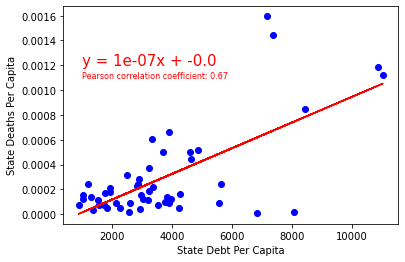

In [21]:
a_plotdf = final_df[['per_cap_debt', 'tot_death_per_cap']]
a_clean_plotdf = a_plotdf.dropna()

x_vals = a_clean_plotdf['per_cap_debt']
y_vals = a_clean_plotdf['tot_death_per_cap']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,8)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals, color='blue')
plt.plot(x_vals,regress_vals, color='red')
plt.annotate(line_eq,(1000,0.0012),fontsize=15,color="red")
plt.annotate(f"Pearson correlation coefficient: {round(corr_df.loc['per_cap_debt', 'tot_death_per_cap'],2)}",(1000,0.0011),fontsize=8,color="red")
plt.xlabel('State Debt Per Capita')
plt.ylabel('State Deaths Per Capita')
plt.savefig('per_cap_debt_vs_per_cap_deaths', bbox_inches='tight')
plt.show()

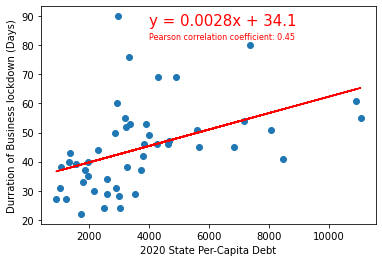

In [22]:
b_plotdf = final_df[['per_cap_debt', 'biz_dur']]
b_clean_plotdf = b_plotdf.dropna()

x_vals = b_clean_plotdf['per_cap_debt']
y_vals = b_clean_plotdf['biz_dur']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals)
plt.plot(x_vals,regress_vals,"r-")
plt.annotate(line_eq,(4000,87),fontsize=15,color="red")
plt.annotate(f"Pearson correlation coefficient: {round(corr_df.loc['per_cap_debt', 'biz_dur'],2)}",(4000,82),fontsize=8,color="red")
plt.xlabel('2020 State Per-Capita Debt')
plt.ylabel('Durration of Business lockdown (Days)')
plt.savefig('state_per_cap_debt_vs_biz_lockdown_durration', bbox_inches='tight')
plt.show()

In [23]:
# would thik this would go the other way because the more debt drives states to want to reopen but it appears there is a counterfactual that states willing to take on more debt may also willing to prolong business closures.

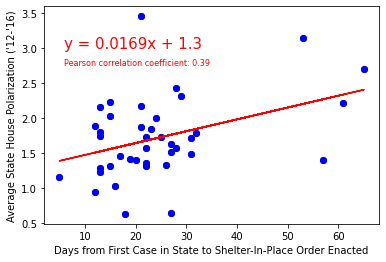

In [24]:
plt.scatter(final_df['order_lag'],final_df['avg_hou_polarz'], color='blue')

b_plotdf = final_df[['order_lag', 'avg_hou_polarz']]
b_clean_plotdf = b_plotdf.dropna()

x_vals = b_clean_plotdf['order_lag']
y_vals = b_clean_plotdf['avg_hou_polarz']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals, color='blue')
plt.plot(x_vals,regress_vals,"r-")
plt.annotate(line_eq,(6,3),fontsize=15,color="red")
plt.annotate(f"Pearson correlation coefficient: {round(corr_df.loc['order_lag', 'avg_hou_polarz'],2)}",(6,2.75),fontsize=8,color="red")
plt.xlabel('Days from First Case in State to Shelter-In-Place Order Enacted')
plt.ylabel('Average State House Polarization (\'12-\'16)')
plt.savefig('lockdown_lag_vs_state_house_polarization', bbox_inches='tight')
plt.show()

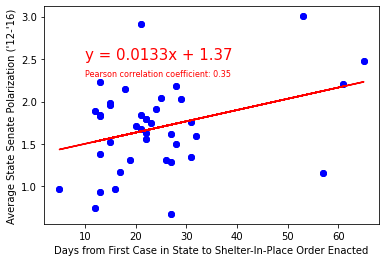

In [25]:
plt.scatter(final_df['order_lag'],final_df['avg_sen_polarz'], color='blue')

b_plotdf = final_df[['order_lag', 'avg_sen_polarz']]
b_clean_plotdf = b_plotdf.dropna()

x_vals = b_clean_plotdf['order_lag']
y_vals = b_clean_plotdf['avg_sen_polarz']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals, color='blue')
plt.plot(x_vals,regress_vals,"r-")
plt.annotate(line_eq,(10,2.5),fontsize=15,color="red")
plt.annotate(f"Pearson correlation coefficient: {round(corr_df.loc['order_lag', 'avg_sen_polarz'],2)}",(10,2.3),fontsize=8,color="red")
plt.xlabel('Days from First Case in State to Shelter-In-Place Order Enacted')
plt.ylabel('Average State Senate Polarization (\'12-\'16)')
plt.savefig('lockdown_lag_vs_state_senate_polarization', bbox_inches='tight')
plt.show()

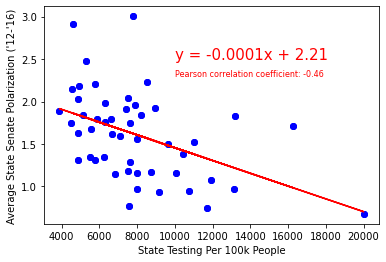

In [26]:
plt.scatter(final_df['test_per_100k'],final_df['avg_sen_polarz'], color='blue')

b_plotdf = final_df[['test_per_100k', 'avg_sen_polarz']]
b_clean_plotdf = b_plotdf.dropna()

x_vals = b_clean_plotdf['test_per_100k']
y_vals = b_clean_plotdf['avg_sen_polarz']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals, color='blue')
plt.plot(x_vals,regress_vals,"r-")
plt.annotate(line_eq,(10000,2.5),fontsize=15,color="red")
plt.annotate(f"Pearson correlation coefficient: {round(corr_df.loc['test_per_100k', 'avg_sen_polarz'],2)}",(10000,2.3),fontsize=8,color="red")
plt.xlabel('State Testing Per 100k People')
plt.ylabel('Average State Senate Polarization (\'12-\'16)')
plt.savefig('state_testing_vs_state_senate_polarization', bbox_inches='tight')
plt.show()

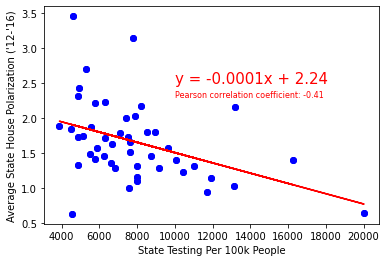

In [27]:
plt.scatter(final_df['test_per_100k'],final_df['avg_hou_polarz'], color='blue')

b_plotdf = final_df[['test_per_100k', 'avg_hou_polarz']]
b_clean_plotdf = b_plotdf.dropna()

x_vals = b_clean_plotdf['test_per_100k']
y_vals = b_clean_plotdf['avg_hou_polarz']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_vals,y_vals, color='blue')
plt.plot(x_vals,regress_vals,"r-")
plt.annotate(line_eq,(10000,2.5),fontsize=15,color="red")
plt.annotate(f"Pearson correlation coefficient: {round(corr_df.loc['test_per_100k', 'avg_hou_polarz'],2)}",(10000,2.3),fontsize=8,color="red")
plt.xlabel('State Testing Per 100k People')
plt.ylabel('Average State House Polarization (\'12-\'16)')
plt.savefig('state_testing_vs_state_house_polarization', bbox_inches='tight')
plt.show()